In [1]:
import sys
sys.path.append("..")

import os
from pathlib import Path
from typing import Optional

In [2]:
os.getcwd()

'/home/eva/Stapline/ff_generator/example'

In [3]:
from parameteriser import runner

/home/eva/anaconda3/envs/qm_resp_3.8/lib/python3.8/site-packages/psiresp/charge.py:282: FutureWarning: `symmetric_atoms_are_equivalent` will be set to False by default for now, as it is a new feature. It will be set to True by default in the future
  warnings.warn(


Initialise object with a smile string / Use config in config.json if no config file provided, default HF/ file is used. Alternatively  options can be modified in config.py

In [4]:
parm = runner.FF_Genenerator("CNC(=O)[C@H](CCCC=CCCC[C@@H](NC(C)=O)C(=O)NC)NC(C)=O" ,"config.json" )


#parm = runner.FF_Genenerator("CNC(=O)[C@H]CCCC=CC" ,"config.json" )


Treating your residue as a stapled residue
SP2
SP2
((0, 1, 26, 27, 28, 29), (2, 3, 4, 22, 54), (5, 6, 7, 8, 9, 10, 11, 12, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44), (13, 14, 18, 19, 46), (15, 16, 17, 47, 48, 49), (20, 21, 50, 51, 52, 53), (23, 24, 25, 55, 56, 57), (30,), (45,))
[2, 3, 4, 22, 54]
[0, 1, 26, 27, 28, 29, 20, 21, 50, 51, 52, 53, 23, 24, 25, 55, 56, 57, 30]


simple rdkit command to display the molecule  note that the bakbone atoms are highlighted

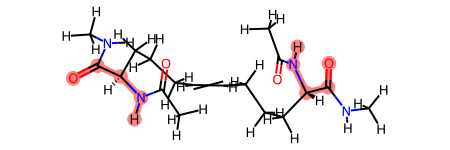

In [5]:
parm.mol

prepare qm inputs for RESP


if you want to run locally then parm.run_qm_resp(), here the qm has been ran externally
once ran go to the cell

In [6]:
parm.get_resp_job_eva()

/home/eva/anaconda3/envs/qm_resp_3.8/lib/python3.8/site-packages/psiresp/charge.py:282: FutureWarning: `symmetric_atoms_are_equivalent` will be set to False by default for now, as it is a new feature. It will be set to True by default in the future
  warnings.warn(


In [7]:
parm.psiresp_job

Job(molecules=[Molecule(name=C18H32N4O4, charge=0) with 1 conformers], qm_optimization_options=QMGeometryOptimizationOptions(method='b3lyp', basis='sto-3g', pcm_options=None, driver='gradient', query_interval=20, protocols={'wavefunction': 'orbitals_and_eigenvalues'}, keywords={}, g_convergence='gau_tight', max_iter=200, full_hess_every=10, jobname='optimization'), qm_esp_options=QMEnergyOptions(method='b3lyp', basis='sto-3g', pcm_options=None, driver='energy', query_interval=20, protocols={'wavefunction': 'orbitals_and_eigenvalues'}, keywords={}, jobname='single_point'), grid_options=GridOptions(grid_rmin=0, grid_rmax=-1, use_radii='msk', vdw_radii={}, vdw_scale_factors=[1.4, 1.6, 1.8, 2.0], vdw_point_density=1.0), resp_options=RespOptions(restraint_slope=0.1, restrained_fit=True, exclude_hydrogens=True, convergence_tolerance=1e-06, max_iter=500, restraint_height_stage_1=0.0005, restraint_height_stage_2=0.001, stage_2=True), charge_constraints=ChargeConstraintOptions(charge_sum_constr

In [8]:
parm.run_resp_job_eva(parm.psiresp_job)

generating-orientations: 100%|██████████| 1/1 [00:00<00:00, 30.33it/s]


SystemExit: Exiting to allow running QM computations; commands are in resp_qm_calculations/single_point/run_single_point.sh

/home/eva/anaconda3/envs/qm_resp_3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
parm.run_qm_get_charges_eva(parm.psiresp_job)

compute-esp: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]


In [10]:
parm.charges

array([-0.4328969124448564, -0.2562064910047097,  0.3990458072269124,
       -0.334060268652787 , -0.0181622942955062, -0.1436591260103416,
       -0.0320469540961783, -0.0112390858912743, -0.213359268303087 ,
       -0.1087577711875595, -0.0070542906592549,  0.0199950744070444,
        0.012882458419748 , -0.1722604729520893, -0.1906002757798695,
        0.3415428676207617, -0.3892935015100161, -0.2625421493396134,
        0.3945575286270143, -0.3479387028932143, -0.2550671757532804,
       -0.249172545061391 , -0.2686507327635017,  0.3182665232771499,
       -0.1906952504470744, -0.3024962744796596,  0.156261069774483 ,
        0.156261069774483 ,  0.156261069774483 ,  0.2460839724790437,
        0.0154841949448521,  0.0525325571132786,  0.0525325571132786,
        0.0294585343407172,  0.0294585343407172,  0.0453794129139689,
        0.0453794129139689,  0.1005919131516395,  0.0600707053826587,
        0.0309022181791462,  0.0309022181791462,  0.015330507646792 ,
        0.0153305076

And that is step 1 over ! check your folder you should have a .lib file

Let move on to the dihedral parameterisation 

In [ ]:
#Not yet working but that's the plan
parm.prepare_qm_dih()
parm.run_dih_fit()

you can use  parm.run_qm_dih() to run locally or go to the folder and run the qm elsewhare

you now should have a .frcmod file in your folder 
enjoy your MDs !